In [1]:
import os
import random
import string
import numpy as np
%matplotlib notebook
import matplotlib.pylab as plt
from tqdm.notebook import tqdm

In [2]:
File_data = np.loadtxt(r'C:\Users\Zamani\cipher_text.txt', dtype=str)
np.shape(File_data)

(1000, 2)

In [3]:
# Split the data up into respectable sections
pt = File_data[:,0]
ct = File_data[:,1]

In [4]:
result_data = np.loadtxt(r'C:\Users\Zamani\result.txt', dtype=str)
print(result_data)
np.shape(result_data)
y=np.reshape(result_data,[1000,16])
np.shape(y)

['CE58D62DC430CD2E' 'C430CD2E9CE468CD' '9CE468CD31DB78AB' ...
 '4D54996A174E7A23' '174E7A2380EFFAEC' '80EFFAECCBC48EF7']


(1000, 16)

In [5]:
n = 2
my_List = np.empty((1000,8),dtype=int)
for i in range(0,1000):
        x = 0
        for idx in range(0,15,n):
            my_List[i,x] = int(ct[i][idx:idx+n],16)
            x = x+1

In [6]:
Trace = np.load(r'C:\Users\Zamani\powertraces.npy')
Trace

array([[-45.11879947,  69.18449037, 318.69409474, ...,  18.78118988,
        155.68611298, 126.85661654],
       [ 45.69642694,  89.99252077, 224.38639856, ..., 142.35273212,
        -32.40241392, 195.34200688],
       [ 94.95983375, 121.19609013,  88.61123488, ..., 113.74325936,
        176.53560128,  39.15542729],
       ...,
       [ 10.68481814, 100.01287454,  95.4116152 , ...,  39.31269099,
        -26.53544612, 125.71886678],
       [ 67.74665565, -45.20644305,  11.95480972, ...,  58.42042476,
         39.7834725 ,  38.29728604],
       [103.66418291,   9.60901836,  59.9853546 , ...,  17.81010909,
         53.61022258,  62.96911811]])

In [7]:
my_List

array([[ 57,  72,  99, ..., 243, 164, 204],
       [182, 134, 165, ..., 154, 180,  42],
       [229,  47, 135, ..., 109,   4,  41],
       ...,
       [125, 134,  15, ...,   5,  45, 234],
       [102,  50,  42, ...,   4, 248, 225],
       [146, 158,  59, ...,  23, 183, 255]])

In [8]:
my_List.shape

(1000, 8)

In [9]:
S1 = np.array([14, 4, 13, 1, 2, 15, 11, 8, 3, 10, 6, 12, 5, 9, 0, 7,
         0, 15, 7, 4, 14, 2, 13, 1, 10, 6, 12, 11, 9, 5, 3, 8,
         4, 1, 14, 8, 13, 6, 2, 11, 15, 12, 9, 7, 3, 10, 5, 0,
         15, 12, 8, 2, 4, 9, 1, 7, 5, 11, 3, 14, 10, 0, 6, 13],dtype="uint8")
def model(ct,Trace):
    # For byte 0 DES
    #SboxOut = np.empty((ct.shape[0],65),dtype="uint8")
    mean_diffs = np.zeros(64)
    #print(SboxOut.shape)
    for guess in range(64):
        
        one_list = []
        zero_list = []
        
        for i in range(1000):
            R0 = (my_List[i][0]<<1) >> 3
            R1 = my_List[i][4] &1
            R = ((R0<<1) ^ R1) %(0x3f)
            SboxOut= S1[R^guess]
            if SboxOut & 0x1:
                one_list.append(Trace[i])
            else:
                zero_list.append(Trace[i])
        one_avg = np.asarray(one_list).mean(axis=0)
        zero_avg = np.asarray(zero_list).mean(axis=0)
        mean_diffs[guess] = np.max(abs(one_avg - zero_avg))
        
        print("Guessing %02x: %f"%(guess, mean_diffs[guess]))
                
        #max_diff_value = mean_diffs[key_byte_guess_value] 
            

        return mean_diffs

In [10]:
Sb = model(my_List,Trace)

Guessing 00: 10.161973


In [11]:
# Ranking Guesses

def model2(ct,Trace):
    mean_diffs = np.zeros((64,1))
    #print(SboxOut.shape)
    for guess in tqdm(range(64)):
        
        one_list = []
        zero_list = []
        
        for i in range(1000):
            R0 = (ct[i][4]>>7)&1
            R1 = ct[i][0]<<1
            R1 = R1 >> 3
            R = ((R0)^(R1<<1))%(0x3f)
            SboxOut= S1[R^guess]
            if SboxOut & 0x1:
                one_list.append(Trace[i])
            else:
                zero_list.append(Trace[i])
        one_avg = np.asarray(one_list).mean(axis=0)
        #print(guess,one_avg)
        zero_avg = np.asarray(zero_list).mean(axis=0)
        #print(guess,zero_avg)
        mean_diffs[guess] = np.max(abs(one_avg - zero_avg))
        #plt.plot(abs(one_avg - zero_avg))
        #print("Guessing %02x: %f"%(guess, mean_diffs[guess]))          
    max_diff_value = np.amax(mean_diffs,axis=0)
    ranked_guesses = sorted(range(64), key=lambda k: mean_diffs[k], reverse=True)
    #max_diff_value = mean_diffs[key_byte_guess_value] 
    #print('\n')  
    
    return max_diff_value,ranked_guesses[0:4]
    

In [12]:
max_diff_value,ranked_guess= model2(my_List,Trace)

  0%|          | 0/64 [00:00<?, ?it/s]

In [13]:
def hex2bin(s):
    mp = {'0' : "0000",
        '1' : "0001",
        '2' : "0010",
        '3' : "0011",
        '4' : "0100",
        '5' : "0101",
        '6' : "0110",
        '7' : "0111",
        '8' : "1000",
        '9' : "1001",
        'A' : "1010",
        'B' : "1011",
        'C' : "1100",
        'D' : "1101",
        'E' : "1110",
        'F' : "1111" }
    bin = ""
    for i in range(len(s)):
        bin = bin + mp[s[i]]
    return bin

len(hex2bin("AABB09182736CCDD"))

64

In [16]:
# Plotting Differences

def calculate_diffs(ct,powerT, byteindex=0, guess=0):
       
    one_list = []
    zero_list = []
    for trace_index in tqdm(range(1000)):
        #SboxOut = np.empty((ct.shape[0],64),dtype="uint8")
        R0 = (ct[trace_index][4]>>7)&1
        R1 = ct[trace_index][0]<<1
        R1 = R1 >> 3
        R = ((R0<<1) ^ R1)%(0x3f)
        SboxOut= S1[R^guess]
        #print(SboxOut)
        #Mask off the requested bit
        if (SboxOut & 0x1).all():
            one_list.append(Trace[i])
        else:
            zero_list.append(Trace[i])
    one_avg = np.asarray(one_list).mean(axis=0)
    zero_avg = np.asarray(zero_list).mean(axis=0)
    return abs(one_avg - zero_avg)

<IPython.core.display.Javascript object>


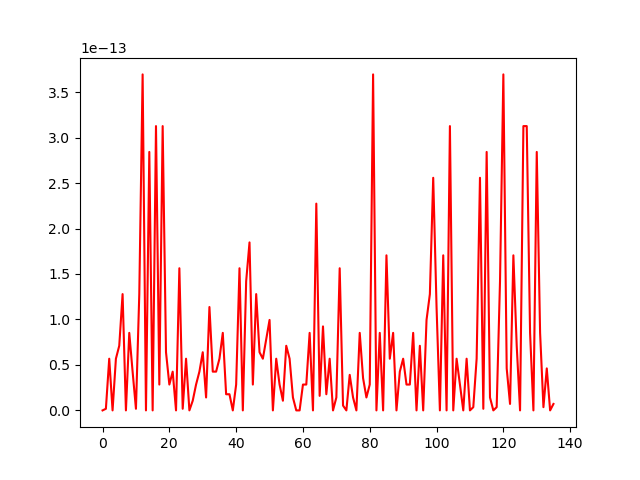

  0%|          | 0/1000 [00:00<?, ?it/s]

In [17]:
%matplotlib notebook
plt.figure()
plt.plot(calculate_diffs(my_List,Trace, byteindex=0, guess=0),'r')

In [18]:
my_List&0x1

array([[1, 0, 1, ..., 1, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 1, 0, 1],
       ...,
       [1, 0, 1, ..., 1, 1, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 1, ..., 1, 1, 1]], dtype=int32)

<IPython.core.display.Javascript object>


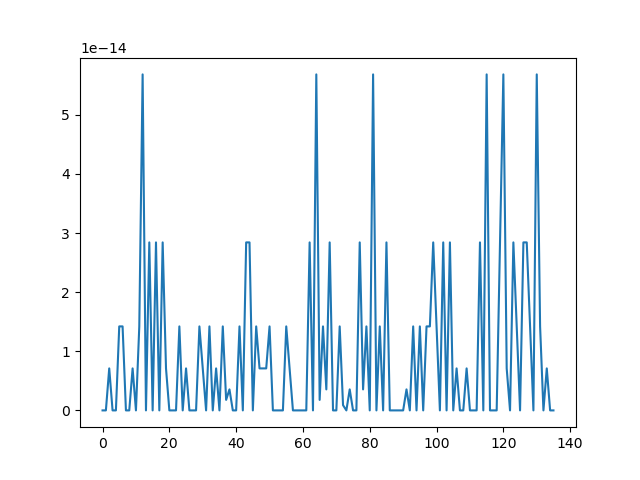

  0%|          | 0/1000 [00:00<?, ?it/s]

In [19]:
# I think the issue was from the way my_List was getting thrown into the mix
plt.figure()
plt.plot(calculate_diffs(my_List,Trace, byteindex=0,guess=1))

In [20]:
# For byte = 0 we take all key guesses [0,63]
# you can also do this for all bytes if you create another loop and change the size of z to be MxN
# M is the number of samples, N is the number of guesses
z = np.empty((136,64),dtype=np.float64)
for i in range(64):
    z[:,i] = calculate_diffs(my_List,Trace, byteindex=0,guess=i)

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

In [21]:
z

array([[1.42108547e-14, 1.42108547e-14, 5.68434189e-14, ...,
        7.10542736e-14, 0.00000000e+00, 1.77635684e-15],
       [1.84741111e-13, 0.00000000e+00, 0.00000000e+00, ...,
        5.68434189e-14, 0.00000000e+00, 4.26325641e-14],
       [0.00000000e+00, 2.84217094e-14, 1.42108547e-14, ...,
        0.00000000e+00, 0.00000000e+00, 1.42108547e-14],
       ...,
       [7.10542736e-15, 2.84217094e-14, 4.26325641e-14, ...,
        6.82121026e-13, 0.00000000e+00, 7.10542736e-14],
       [2.84217094e-13, 7.10542736e-15, 1.42108547e-13, ...,
        6.82121026e-13, 0.00000000e+00, 1.70530257e-13],
       [8.52651283e-14, 2.84217094e-14, 4.26325641e-14, ...,
        5.68434189e-14, 0.00000000e+00, 7.10542736e-15]])

<IPython.core.display.Javascript object>


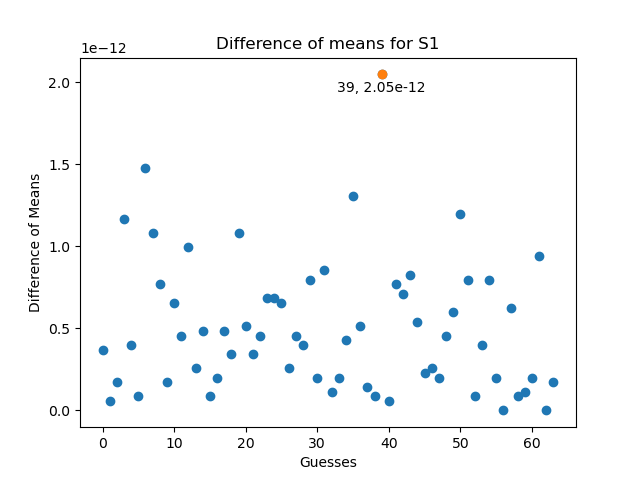

Text(0, -15, '39, 2.05e-12')

In [22]:
# Example taking the max of guess = 0
max0 = np.max(z[:,0])
max0
Mx = np.empty((64,1))
for k in range(64):
    Mx[k] = np.max(z[:,k])
Mx.shape
plt.figure()
plt.scatter(np.linspace(0,63,64),Mx)
plt.scatter(np.argmax(Mx),np.max(Mx))
plt.xlabel("Guesses")
plt.ylabel("Difference of Means")
plt.title("Difference of means for S1")
label = '%d, %.2e' % (np.argmax(Mx),np.max(Mx)) #"{:n,:.2f}".format(np.argmax(Mx),np.max(Mx))
plt.annotate(label, # this is the text
             (np.argmax(Mx),np.max(Mx)), # these are the coordinates to position the label
             textcoords="offset points", # how to position the text
             xytext=(0,-15), # distance from text to points (x,y)
             ha='center',
             va='bottom') # horizontal alignment can be left, right or center